# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Dave
[nltk_data]     Family\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('newsapi.env')

True

In [3]:
#find_dotenv()

In [4]:
api_key=os.getenv('news_api')

In [5]:
print(api_key)

89c6d4a484cd4840a7ab9d95559365ed


In [6]:
#api_key="89c6d4a484cd4840a7ab9d95559365ed"

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [8]:
api_key

'89c6d4a484cd4840a7ab9d95559365ed'

In [9]:
# Fetch the Bitcoin news articles
btc_news=newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')


In [10]:
articles1=[]
for each_article in btc_news['articles']: 
    articles1.append(each_article['content'])
btc_df_org=pd.DataFrame(articles1)



In [11]:
articles1

['Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]',
 'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]',
 'Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars]',
 'Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]',
 'Last week, whenElon Musk tweeted that he had spoken with the team of Doge developers about how to make the coin mo

In [12]:
#analyzer.polarity_scores('great')

In [13]:
# Fetch the Ethereum news articles
eth_news=newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')


In [14]:
articles2=[]
for each_article in eth_news['articles']: 
    articles2.append(each_article['content'])
eth_df_org=pd.DataFrame(articles2)


In [15]:
articles2

['Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]',
 'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]',
 'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars]',
 'Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk m… [+1182 chars]',
 '',
 'It took a while to get here, but Dfinity is finally launching.\xa0\r\nIn July 2018, I went to the Swiss city of Zug

In [16]:
# Create the Bitcoin sentiment scores DataFrame
def headline_sentiment_summarizer_avg_btc(headlines):
    sentiment = []
    for article in headlines:
#        article_score = []
#        for word in article.split():
#            if word == None:
#                continue
#            else:
#                article_score.append(analyzer.polarity_scores(word)["compound"])
        # print(word)
#        sentiment.append(sum(article_score) / len(article_score))
        sentiment.append(analyzer.polarity_scores(article))
    return sentiment
btc_df=pd.DataFrame(headline_sentiment_summarizer_avg_btc(articles1))


In [17]:
btc_df.head()

,neg,neu,pos,compound
0,0.00,0.929,0.071,0.3818
1,0.00,0.942,0.058,0.2960
2,0.05,0.816,0.134,0.4939
3,0.00,1.000,0.000,0.0000
4,0.00,0.925,0.075,0.4754


In [18]:
btc_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.042100,0.880700,0.077250,0.171110
std,0.050826,0.076843,0.075344,0.474856
min,0.000000,0.736000,0.000000,-0.762700
25%,0.000000,0.820750,0.000000,-0.050575
50%,0.025000,0.886500,0.070000,0.273000
75%,0.073500,0.929000,0.140250,0.513100
max,0.180000,1.000000,0.217000,0.845500


In [19]:
headline_sentiment_summarizer_avg_btc(articles1)

[{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'compound': 0.296},
 {'neg': 0.05, 'neu': 0.816, 'pos': 0.134, 'compound': 0.4939},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.4754},
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.8455},
 {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.7322},
 {'neg': 0.087, 'neu': 0.847, 'pos': 0.066, 'compound': -0.2023},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.7627},
 {'neg': 0.096, 'neu': 0.904, 'pos': 0.0, 'compound': -0.5267},
 {'neg': 0.071, 'neu': 0.859, 'pos': 0.071, 'compound': 0.25},
 {'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.5574},
 {'neg': 0.067, 'neu': 0.773, 'pos': 0.159, 'compound': 0.5707},
 {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7434},


In [20]:
# Create the Ethereum sentiment scores DataFrame
def headline_sentiment_summarizer_avg_eth(headlines):
    sentiment = []
    for article in headlines:
#        article_score = []
 #       for word in article.split():
  #          if word == None:
#                 continue
#            else:
#             article_score.append(analyzer.polarity_scores(word)["compound"])
        # print(word)
#        sentiment.append(sum(article_score) / len(article_score))
        sentiment.append(analyzer.polarity_scores(article))
    return sentiment
eth_df=pd.DataFrame(headline_sentiment_summarizer_avg_eth(articles2))
eth_df.head()

,neg,neu,pos,compound
0,0.000,0.940,0.060,0.2263
1,0.150,0.778,0.072,-0.4019
2,0.000,0.917,0.083,0.4019
3,0.087,0.847,0.066,-0.2023
4,0.000,0.000,0.000,0.0000


In [21]:
headline_sentiment_summarizer_avg_eth(articles2)

[{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.2263},
 {'neg': 0.15, 'neu': 0.778, 'pos': 0.072, 'compound': -0.4019},
 {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.4019},
 {'neg': 0.087, 'neu': 0.847, 'pos': 0.066, 'compound': -0.2023},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'compound': -0.34},
 {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.128},
 {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.34},
 {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8176},
 {'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'compound': 0.1027},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'compound': 0.0516},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.132, 'neu': 0.801, 'pos': 0.067, 'compound': -0.3612},
 {'neg': 0.047, 'neu': 0.831, 'pos': 0.122, 'compound': 0.4404},
 {'neg': 0.0, 'neu

In [22]:
analyzer.polarity_scores('today is a good day')

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [23]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.042100,0.880700,0.077250,0.171110
std,0.050826,0.076843,0.075344,0.474856
min,0.000000,0.736000,0.000000,-0.762700
25%,0.000000,0.820750,0.000000,-0.050575
50%,0.025000,0.886500,0.070000,0.273000
75%,0.073500,0.929000,0.140250,0.513100
max,0.180000,1.000000,0.217000,0.845500


In [24]:
# Describe the Ethereum Sentiment
eth_df.describe()

,neg,neu,pos,compound
count,20.000000,20.00000,20.000000,20.000000
mean,0.024500,0.87085,0.054650,0.098670
std,0.047668,0.21820,0.056688,0.316484
min,0.000000,0.00000,0.000000,-0.401900
25%,0.000000,0.84300,0.000000,0.000000
50%,0.000000,0.93300,0.049000,0.025800
75%,0.011750,0.97150,0.074500,0.254725
max,0.150000,1.00000,0.210000,0.817600


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import reuters, stopwords
from string import punctuation
import re

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw =set(stopwords.words('english'))

sw
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
# Complete the tokenizer function #tokenize is to turn into a list ex. [today, is, a, good, day]
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    #if word.lower() not in sw
    
    return tokens

In [29]:
btc_df_org[0]

0     Just weeks after Tesla started accepting Bitco...
1     Shares of Square are up more than 6% today aft...
2     Image: Tesla\r\n\n \n\n Tesla has stopped acce...
3     Illustration by Alex Castro / The Verge\r\n\n ...
4     Last week, whenElon Musk tweeted that he had s...
5     Mark Zuckerberg posted a picture of his two, f...
6     Tesla CEO Elon Musk has changed his stance on ...
7     That love affair between Elon Musk and Bitcoin...
8     Bitcoin, Ethereum and a host of Altcoins suffe...
9     Three years after its inception, crypto financ...
10    Now isn't the greatest time to be a cryptocurr...
11    In spite of the environmental and regulatory i...
12    When it comes to ransomware, you don't always ...
13    The ban affects licensed and unlicensed miners...
14    Hello friends, and welcome back to Week in Rev...
15    Elon Musk really, REALLY likes Dogecoin. \r\nA...
16    An Australian computer scientist who alleges h...
17    A representation of virtual currency Bitco

In [30]:
# Create a new tokens column for Bitcoin
btc_df_org['Tokens']=btc_df_org[0].apply(tokenizer)
btc_df_org

,0,Tokens
0,Just weeks after Tesla started accepting Bitco...,"[week, tesla, started, accepting, bitcoin, cur..."
1,Shares of Square are up more than 6% today aft...,"[shares, square, today, american, fintech, com..."
2,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,"[image, tesla, tesla, ha, stopped, accepting, ..."
3,Illustration by Alex Castro / The Verge\r\n\n ...,"[illustration, alex, castro, verge, cryptocurr..."
4,"Last week, whenElon Musk tweeted that he had s...","[last, week, whenelon, musk, tweeted, spoken, ..."
5,"Mark Zuckerberg posted a picture of his two, f...","[mark, zuckerberg, posted, picture, two, frank..."
6,Tesla CEO Elon Musk has changed his stance on ...,"[tesla, ceo, elon, musk, ha, changed, stance, ..."
7,That love affair between Elon Musk and Bitcoin...,"[love, affair, elon, musk, bitcoin, become, co..."
8,"Bitcoin, Ethereum and a host of Altcoins suffe...","[bitcoin, ethereum, host, altcoins, suffered, ..."
9,"Three years after its inception, crypto financ...","[three, year, inception, crypto, financial, se..."


In [31]:
# Create a new tokens column for Ethereum
# Using DataFrame.insert() to add a column
eth_df_org['Tokens']=eth_df_org[0].apply(tokenizer)
eth_df_org

,0,Tokens
0,"Vitalik Buterin, the creator of Ethereum, on W...","[vitalik, buterin, creator, ethereum, wednesda..."
1,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, detrac..."
2,Solana isn’t known yet outside of the crypto c...,"[solana, isnt, known, yet, outside, crypto, co..."
3,"Bitcoin, Ethereum and a host of Altcoins suffe...","[bitcoin, ethereum, host, altcoins, suffered, ..."
4,,[]
5,"It took a while to get here, but Dfinity is fi...","[took, get, dfinity, finally, launchingin, jul..."
6,This article was translated from our Spanish e...,"[article, wa, translated, spanish, edition, us..."
7,Posted \r\nThe S&amp;P Dow Jones Indices launc...,"[posted, sampp, dow, jones, indices, launched,..."
8,A representation of virtual currency Ethereum ...,"[representation, virtual, currency, ethereum, ..."
9,Sotheby's said on Tuesday it would accept bitc...,"[sothebys, said, tuesday, would, accept, bitco..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [32]:
from collections import Counter
from nltk import ngrams

In [33]:
lemmatizer = WordNetLemmatizer()

# Corpus - list of articles about grains
ids = reuters.fileids(categories='gold')
corpus = [reuters.raw(i) for i in ids]

In [34]:
# Generate the Bitcoin N-grams where N=2
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    return sw_words

def ngram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text_bg(big_string)
    # print(processed)
    bigrams = ngrams(processed, n=2)
    # print(bigrams)
    top_10 = dict(Counter(bigrams).most_common(10)) 
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
    
# Function to generate n-grams from sentences.    
ngram_counter(btc_df_org[0])

,bigram,count
0,"(elon, musk)",7
1,"(accepting, bitcoin)",4
2,"(stopped, accepting)",2
3,"(fossil, fuel)",2
4,"(ceo, elon)",2
5,"(outage, morning)",2
6,"(musk, tweeted)",2
7,"(char, bitcoin)",2
8,"(tesla, inc)",2
9,"(bitcoin, purchase)",2


In [35]:
ngram_counter(btc_df_org[0])

,bigram,count
0,"(elon, musk)",7
1,"(accepting, bitcoin)",4
2,"(stopped, accepting)",2
3,"(fossil, fuel)",2
4,"(ceo, elon)",2
5,"(outage, morning)",2
6,"(musk, tweeted)",2
7,"(char, bitcoin)",2
8,"(tesla, inc)",2
9,"(bitcoin, purchase)",2


In [36]:
# Generate the Ethereum N-grams where N=2
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    return sw_words

def ngram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text_bg(big_string)
    # print(processed)
    bigrams = ngrams(processed, n=2)
    # print(bigrams)
    top_10 = dict(Counter(bigrams).most_common(10)) 
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

# Function to generate n-grams from sentences.

ngram_counter(eth_df_org[0])


,bigram,count
0,"(representation, virtual)",5
1,"(virtual, currency)",5
2,"(seen, front)",5
3,"(front, stock)",5
4,"(stock, graph)",5
5,"(graph, illustration)",5
6,"(illustration, taken)",5
7,"(char, representation)",4
8,"(currency, ethereum)",4
9,"(ethereum, seen)",4


In [37]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)


In [38]:
# Use token_count to get the top 10 words for Bitcoin
long_string=' '.join(btc_df_org[0])
tokens_list=process_text_bg(long_string)
token_count(tokens_list, N=10)

[('char', 20),
 ('bitcoin', 13),
 ('musk', 9),
 ('tesla', 8),
 ('elon', 8),
 ('week', 6),
 ('crypto', 6),
 ('company', 5),
 ('ha', 5),
 ('accepting', 4)]

In [39]:
# Use token_count to get the top 10 words for Ethereum
long_string2=' '.join(eth_df_org[0])
tokens_list2=process_text_bg(long_string)
token_count(tokens_list2, N=10)

[('char', 20),
 ('bitcoin', 13),
 ('musk', 9),
 ('tesla', 8),
 ('elon', 8),
 ('week', 6),
 ('crypto', 6),
 ('company', 5),
 ('ha', 5),
 ('accepting', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [44]:
type(btc_df_org[0])

pandas.core.series.Series

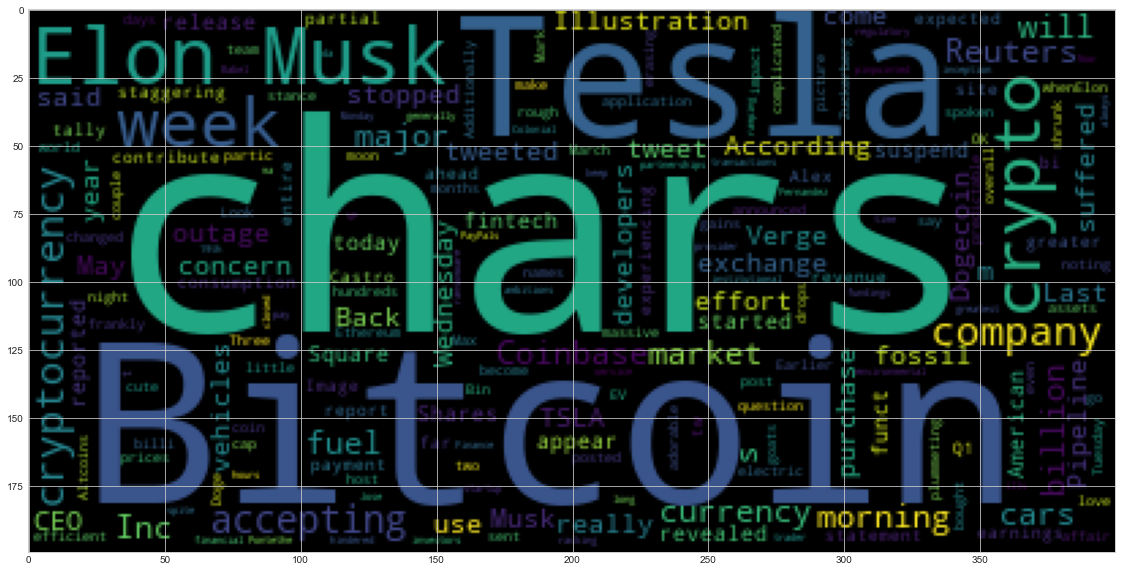

In [46]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_df_org[0]))
plt.imshow(wc)


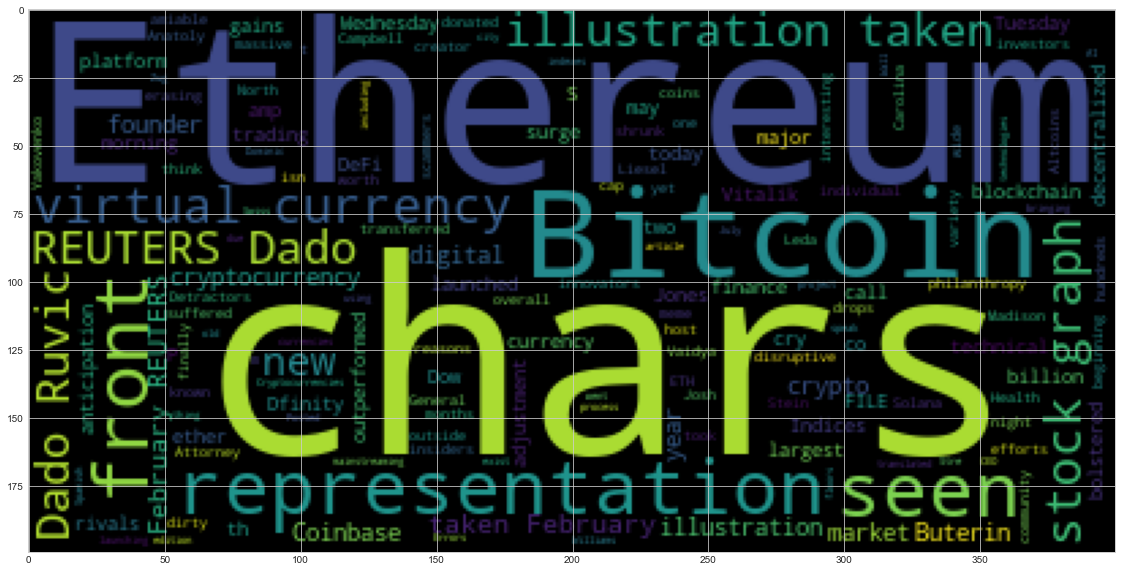

In [47]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_df_org[0]))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [48]:
import spacy
from spacy import displacy

In [49]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-06-04 18:41:19.491464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-04 18:41:19.491494: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
nlp

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
concat=(' '.join(btc_df_org[0]))

In [57]:
# Run the NER processor on all of the text #NER(named entity recognition)-identifies key things of your text
doc=nlp(concat)
# Add a title to the document
doc.user_data['title']='Bitcoin_NER'

In [58]:
# Render the visualization
displacy.render(doc, style='ent')

In [60]:
# List all Entities #.ents returns all entities
for each_int in doc.ents: 
    print(each_int.text, each_int.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
Tesla ORG
Elon Musk PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Last week DATE
Musk PERSON
Dogecoin GPE
Mark Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Three years DATE
Babel Finance ORG
Monday DATE
hours-long TIME
this morning TIME
May 19th DATE
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
more than 5,500 miles QUANTITY
the United States GPE
Photo PERSON
Michele Doying PERSON
Verge ORG
Iran GPE
Last week DATE
Trump ORG
This week DATE
Elon Musk’s ORG
Elon Musk PERSON
Dogecoin GPE
Twitter PRODUCT
Austr

---

### Ethereum NER

In [61]:
# Concatenate all of the Ethereum text together
concat2=(' '.join(eth_df_org[0]))

In [62]:
# Run the NER processor on all of the text
doc2=nlp(concat2)

# Add a title to the document
doc2.user_data['title']='Ethereum_NER'

In [63]:
# Render the visualization
displacy.render(doc2, style='ent')

In [65]:
# List all Entities
for each_int in doc2.ents: 
    print(each_int.text, each_int.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
Solana PERSON
Anatoly Yakovenko PERSON
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Sotheby's ORG
Tuesday DATE
Banksy PERSON
Love WORK_OF_ART
Air LAW
first ORDINAL
NEW YORK GPE
May 7 DATE
Reuters ORG
this year DATE
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
this year DATE
this summer DATE
Ethereum ORG
February 19, 2021 DATE
GPU ORG
today DATE
April 14 DATE
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Bitcoin PERSON
Ethe

---